<a href="https://colab.research.google.com/github/senecamiller/ceudemo/blob/main/session_7_plotnine_to_share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from plotnine import *

# Alcohol consumption by country
data = pd.read_csv('https://raw.githubusercontent.com/misrori/rdata/main/DrinksCountry.csv')
lifeexp = pd.read_csv('https://raw.githubusercontent.com/misrori/rdata/main/ExpectedLifetimes.csv')

In [ ]:
data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Region,Population,Pop. Density,GDP,Birthrate,Deathrate
0,Afghanistan,0.0,0.0,0.0,0.0000,ASIA,31056997.0,47.96,700.0,46.60,20.34
1,Albania,89.0,132.0,54.0,4.8675,EASTERN EUROPE,3581655.0,124.59,4500.0,15.11,5.22
2,Algeria,25.0,0.0,14.0,0.6903,AFRICA,32930091.0,13.83,6000.0,17.14,4.61
3,Andorra,245.0,138.0,312.0,12.3015,WESTERN EUROPE,71201.0,152.14,19000.0,8.71,6.25
4,Angola,217.0,57.0,45.0,5.6463,AFRICA,12127071.0,9.73,1900.0,45.11,24.20
...,...,...,...,...,...,...,...,...,...,...,...
177,Venezuela,333.0,100.0,3.0,7.7172,SOUTH AMERICA,25730435.0,28.21,4800.0,18.71,4.92
178,Vietnam,111.0,2.0,1.0,2.0178,ASIA,84402966.0,256.11,2500.0,16.86,6.22
179,Yemen,6.0,0.0,0.0,0.1062,NEAR EAST,21456188.0,40.64,800.0,42.89,8.30
180,Zambia,32.0,19.0,4.0,0.9735,AFRICA,11502010.0,15.28,800.0,41.00,19.93


# Structure
## 1. your data
ggplot(your_data)
## 2. aesthetics your y, x, color, size, shape  values
aes(x)
aes(x, y)
aes(x, y, color, shappe, size)

## 3. geometric
geom_***
https://plotnine.readthedocs.io/en/stable/api.html#geoms

## 4. labs
labs( title =" ", subtitle = " ",  x=" ", y =" " )

## 5. change theme
https://plotnine.readthedocs.io/en/stable/api.html#themes
https://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.theme.html


## 6.extra
facet  https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_wrap.html

cord_flip


# Alcohol consumption

In [ ]:
(
    ggplot(data) +
    aes(x='beer_servings' ) +
    geom_histogram()
)

In [ ]:
(
    ggplot(data) +
    aes(x='beer_servings' ) +
    geom_histogram(color='orange', fill='darkblue', bins=50)
)

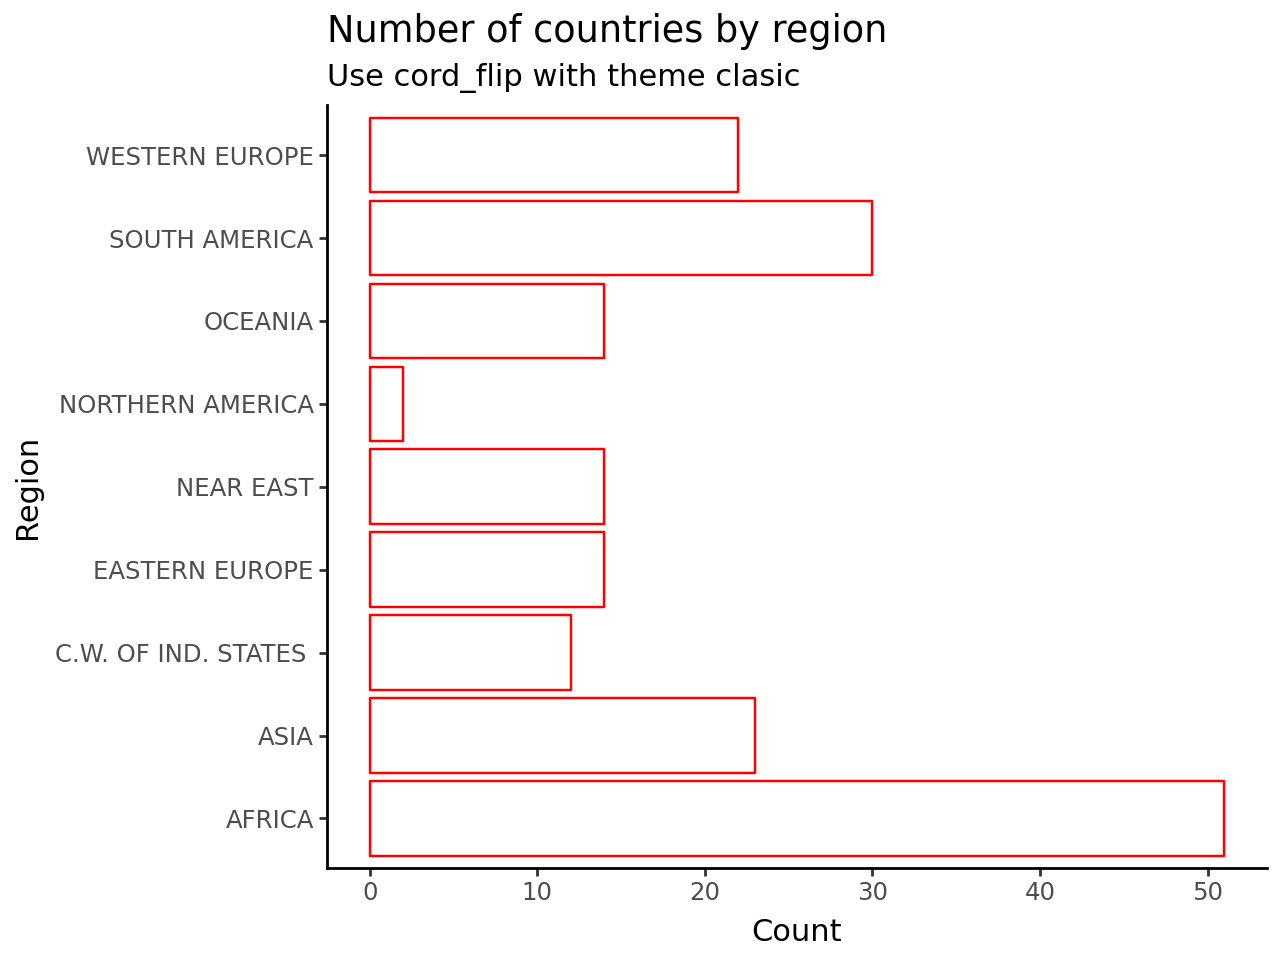

In [ ]:
(
    ggplot(data) +
    aes(x='Region')+  geom_bar(fill=None, color='red') +
    coord_flip() +
    theme_classic() +
    labs(title= 'Number of countries by region', y='Count', subtitle='Use cord_flip with theme clasic')
)

In [ ]:
#tdf = data['Region'].value_counts().reset_index(name='count')
#tdf.rename(columns = {'index':'Region'}, inplace=True  )
tdf = (
    data
    .groupby('Region', as_index = False)
    .agg(count = ('Region', 'count'))
)


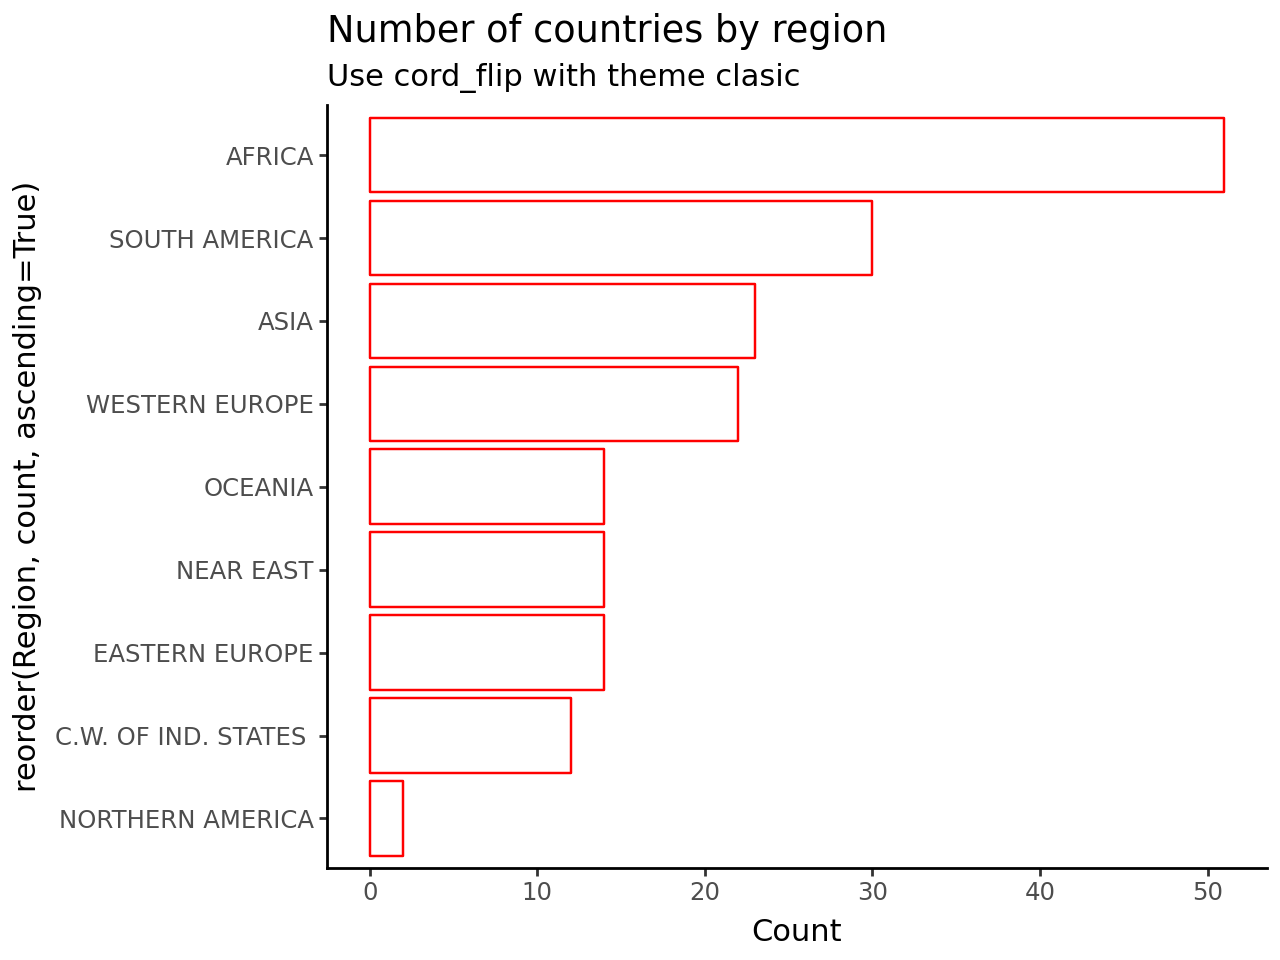

In [ ]:
(
    ggplot(tdf)+
    aes(x='reorder(Region, count, ascending=True)', y='count') +
    coord_flip() +
    geom_col(fill=None, color='red')
    +theme_classic()+
    labs(title= 'Number of countries by region', y='Count', subtitle='Use cord_flip with theme clasic')
)

# Task 1

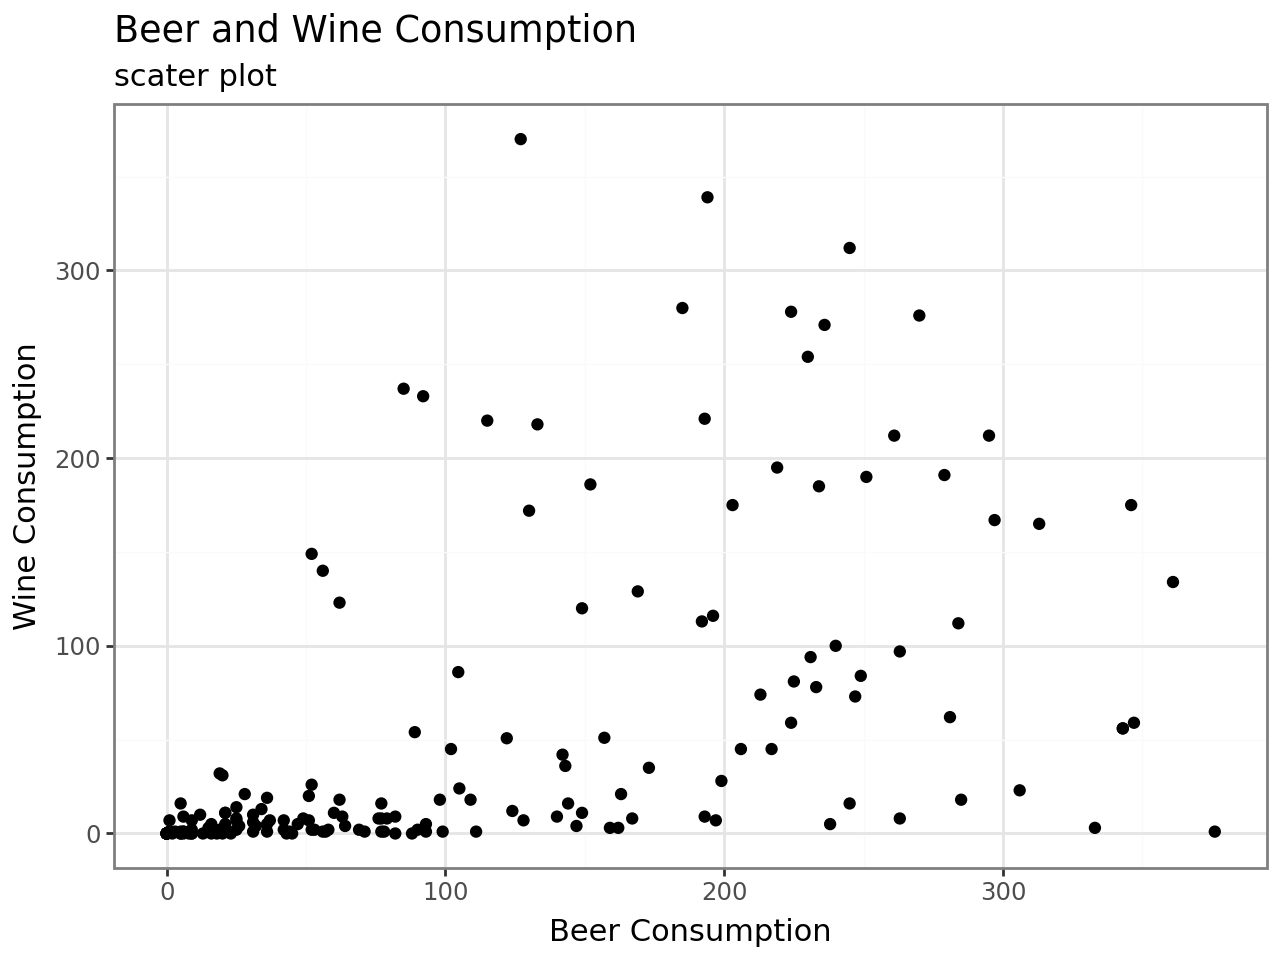

In [33]:
(
    ggplot(data) +
    aes(x ='beer_servings', y ='wine_servings') +
    geom_point() +
    theme_bw() +
    labs(title= 'Beer and Wine Consumption', subtitle= 'scater plot', x= 'Beer Consumption', y= 'Wine Consumption')
)

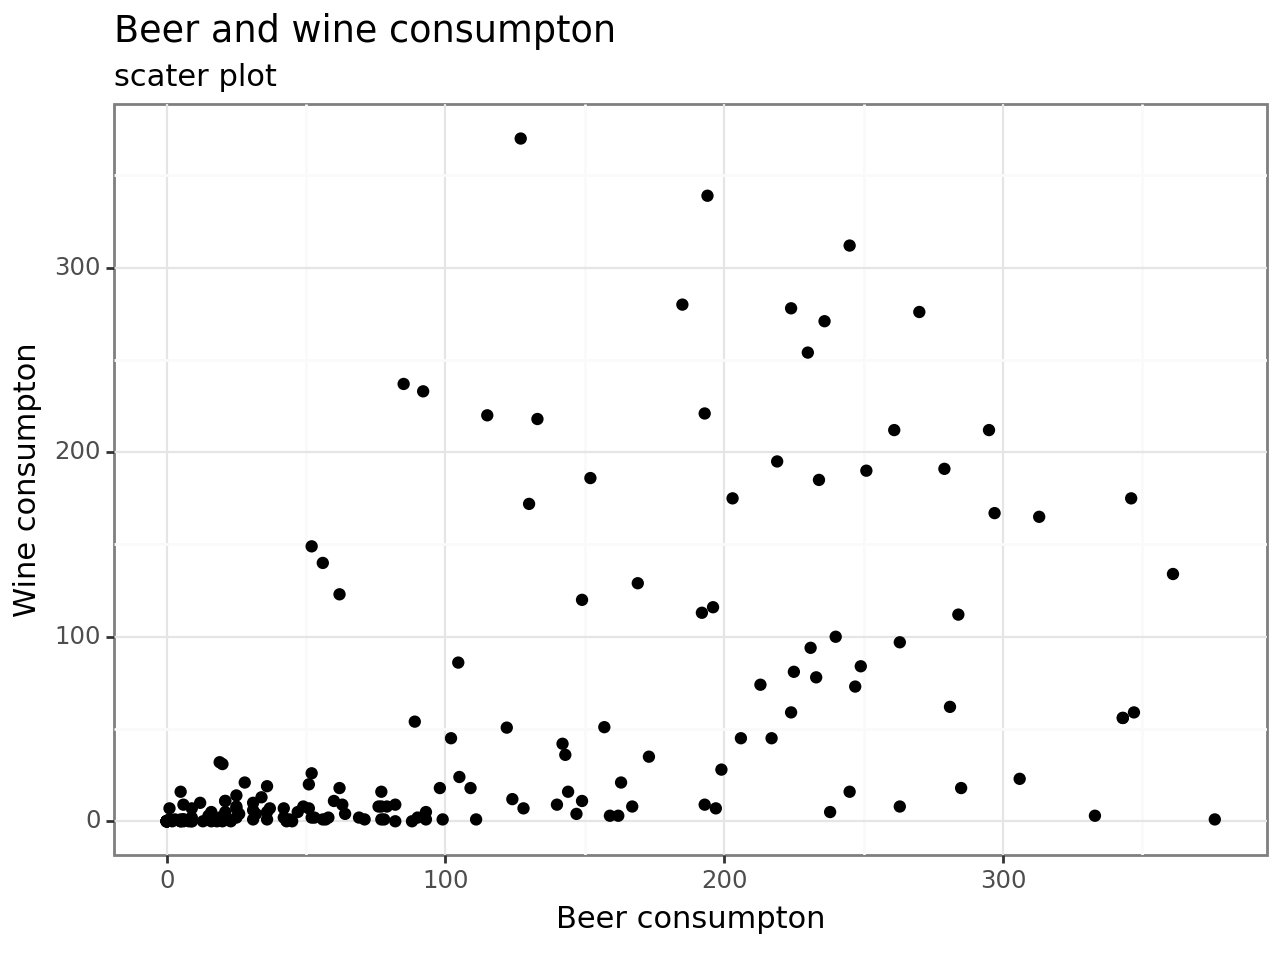

<Figure Size: (640 x 480)>

# Task 2


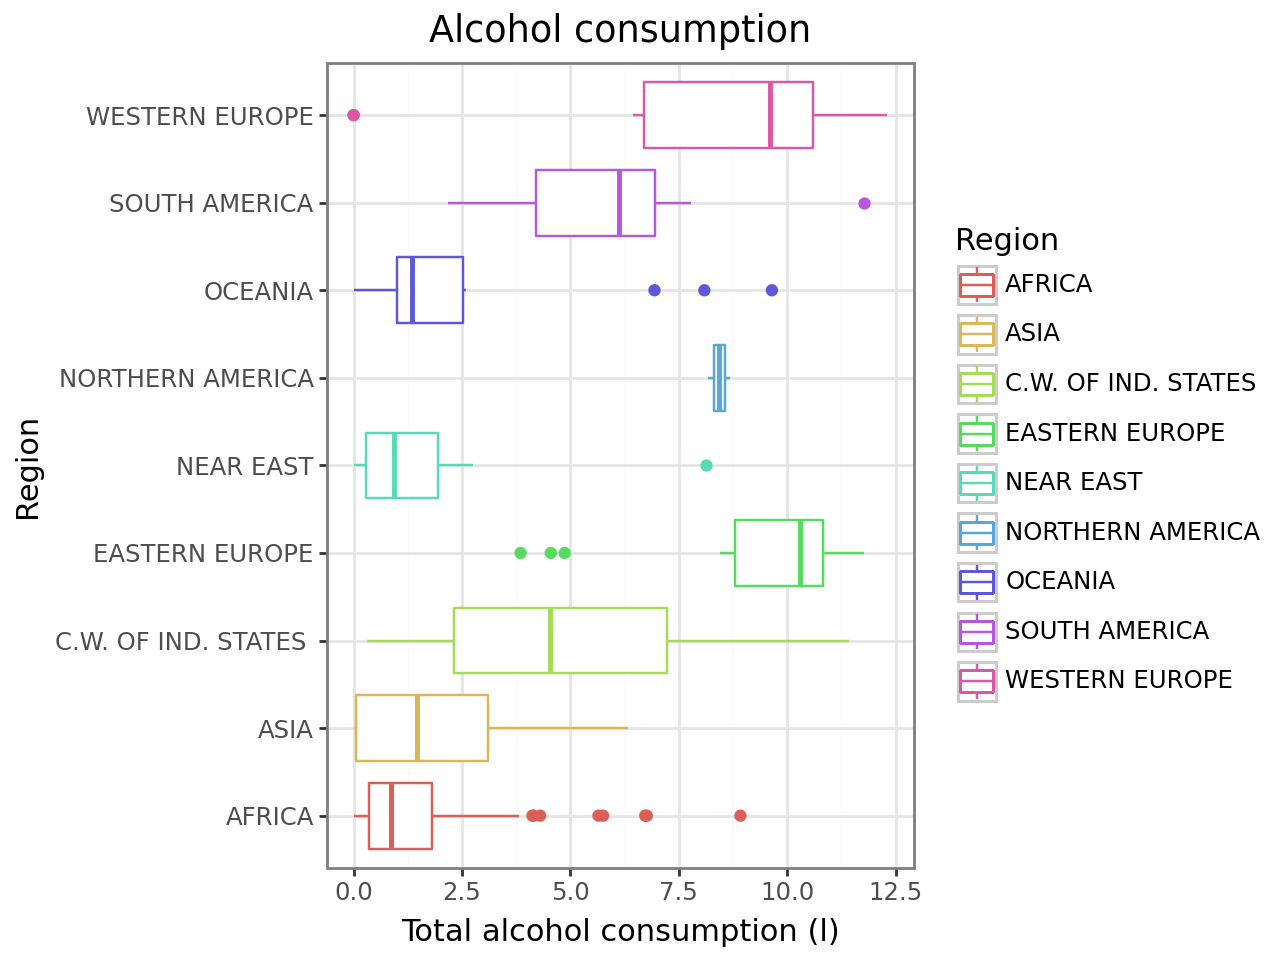

In [36]:
(
    ggplot(data) +
    aes(x= 'Region',y= 'total_litres_of_pure_alcohol', color = 'Region') +
    geom_boxplot() +
    coord_flip() +
    theme_bw() +
    labs(title= 'Alcohol consumption', x='Region', y= 'Total alcohol consumption (l)')
)

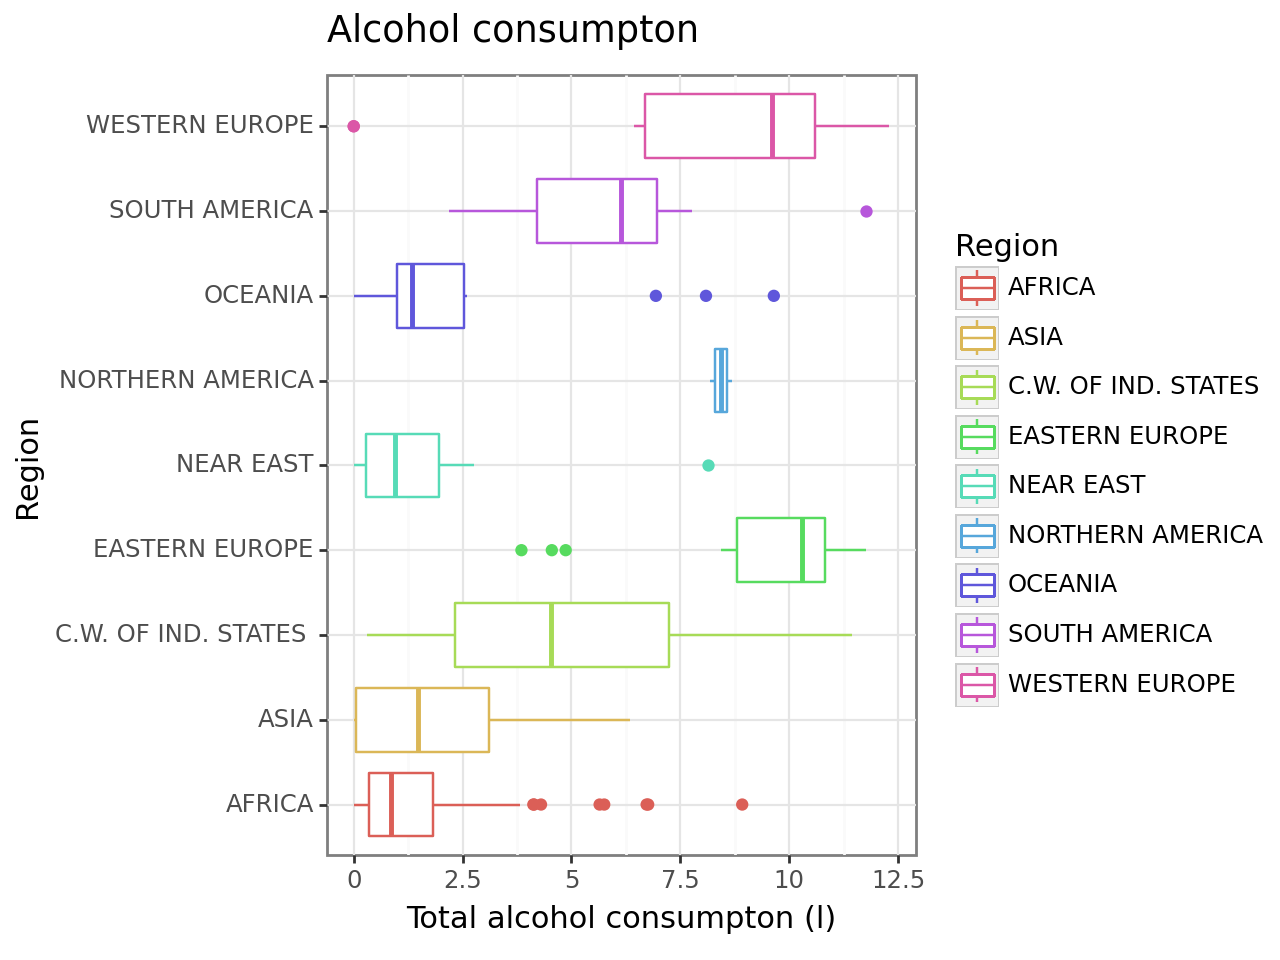

<Figure Size: (640 x 480)>

# Task 3

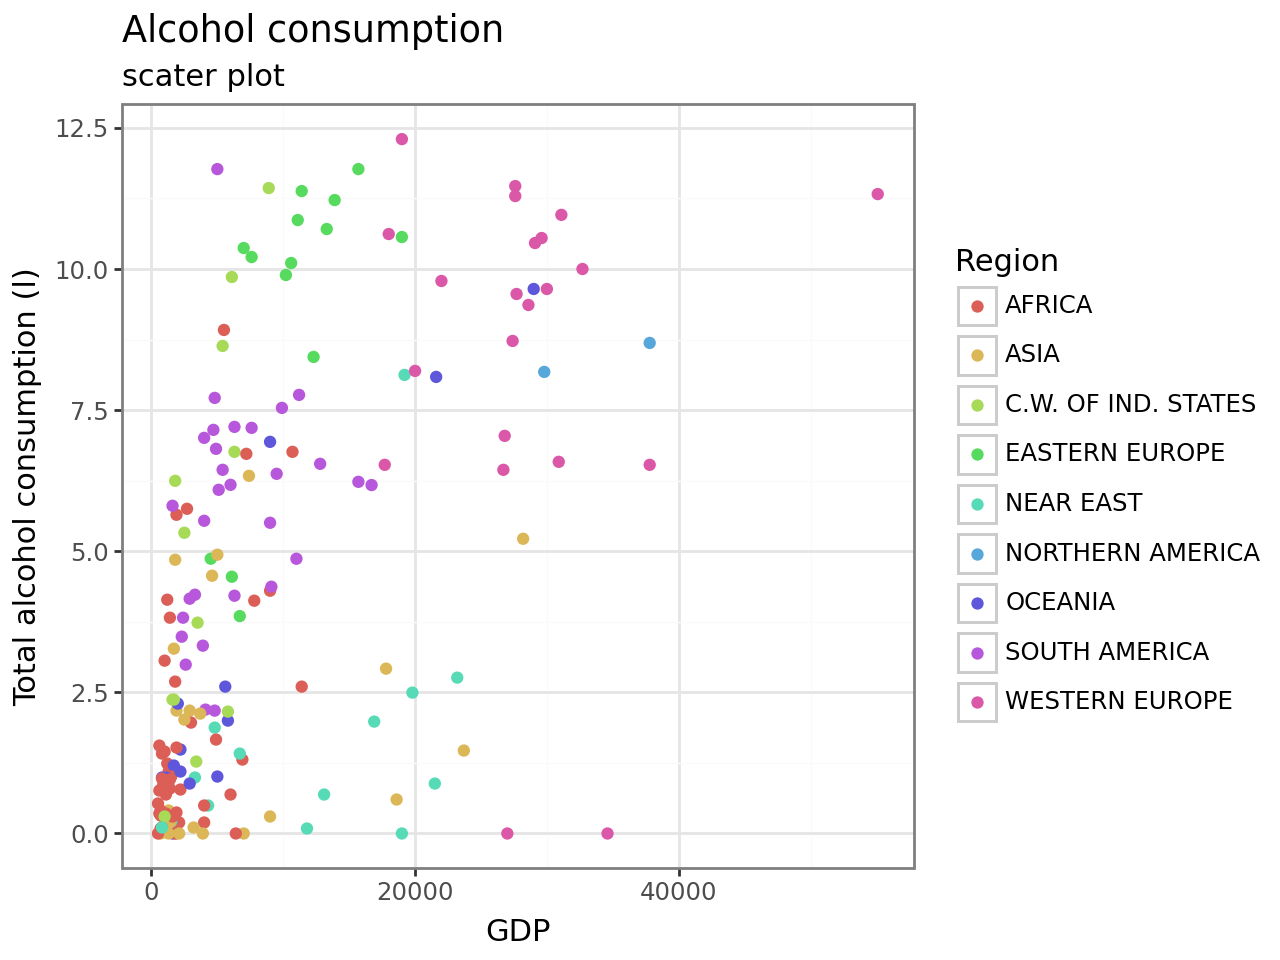

In [49]:
(
    ggplot(data) +
    aes(x= 'GDP', y= 'total_litres_of_pure_alcohol', color='Region') +
    geom_point() +
    theme_bw() +
    labs(title='Alcohol consumption', subtitle='scater plot', x='GDP', y='Total alcohol consumption (l)')
)

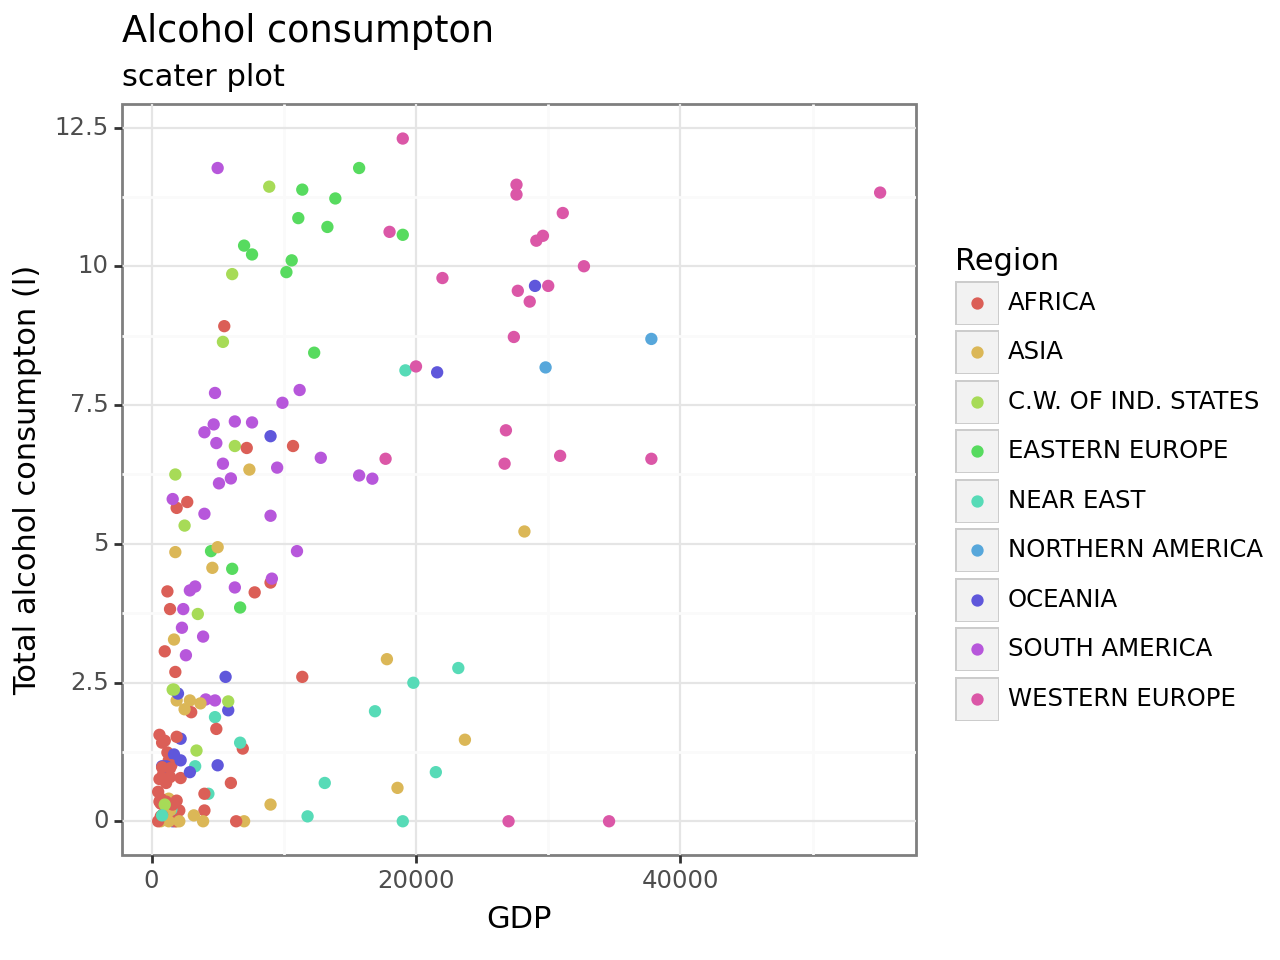

<Figure Size: (640 x 480)>

# Task 4

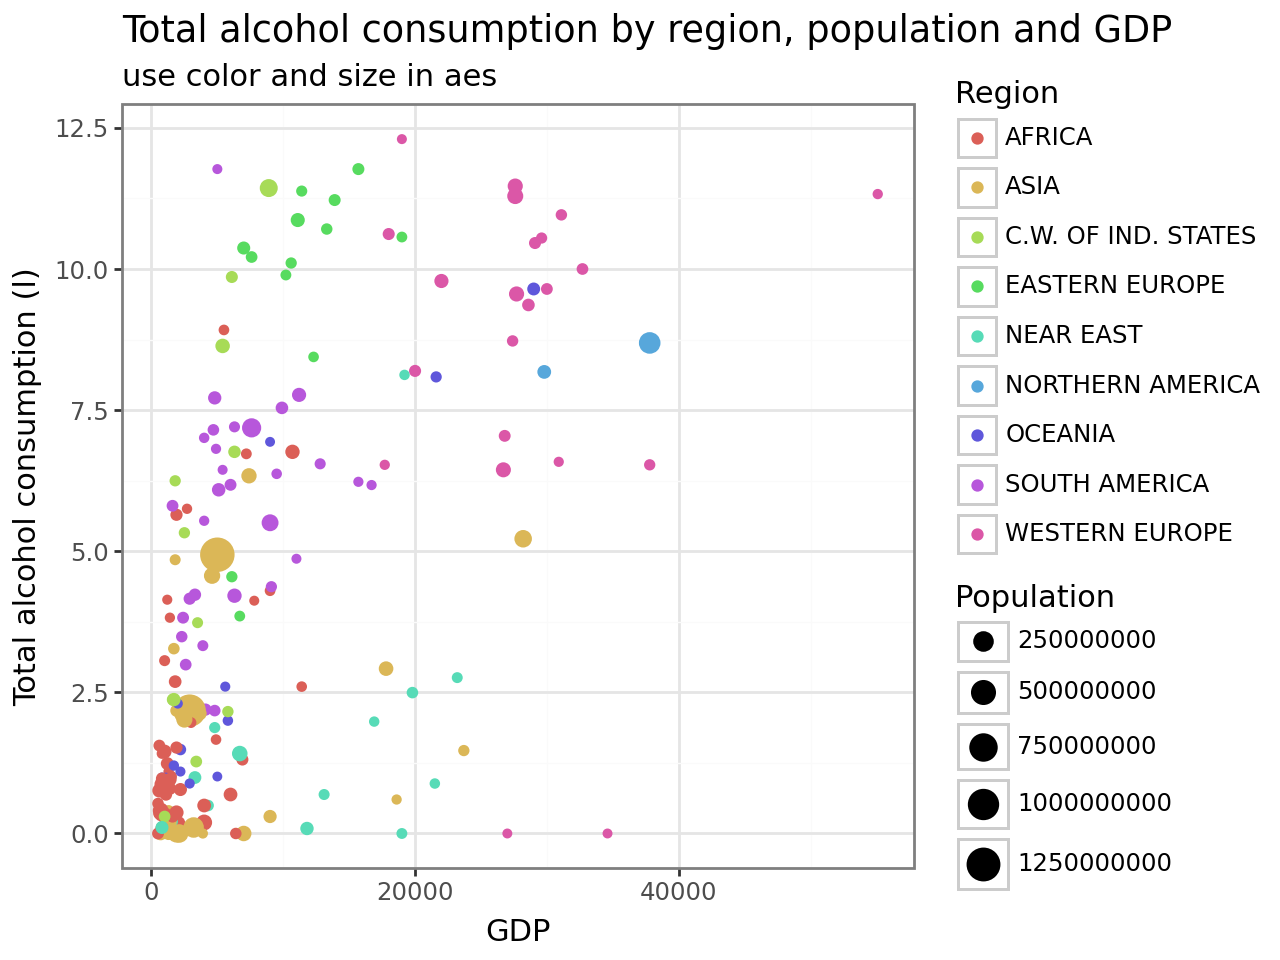

In [82]:
(
    ggplot(data) +
    aes(x= 'GDP', y= 'total_litres_of_pure_alcohol', color= 'Region', size='Population') +
    geom_point() +
    theme_bw() +
    labs(title= 'Total alcohol consumption by region, population and GDP', subtitle= 'use color and size in aes', x= 'GDP', y= 'Total alcohol consumption (l)')
)

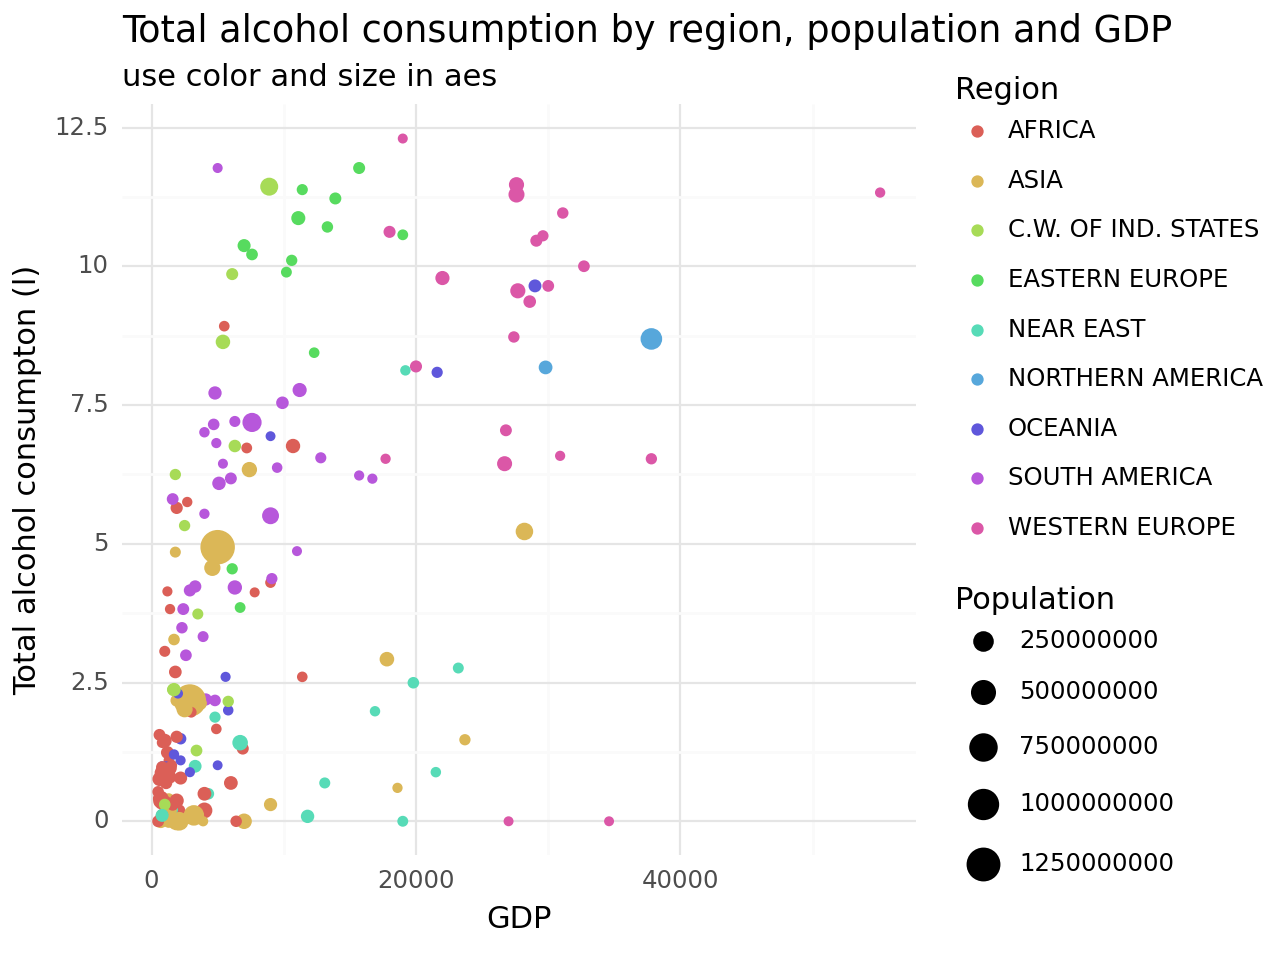

<Figure Size: (640 x 480)>

#Task 5

use geom_jitter to ad some spaces to the points



In [73]:
lifeexp

,year,region,country,gender,expected_lifetime
0,2013,Eastern Mediterranean,Afghanistan,Both sexes,61.25205
1,2013,Eastern Mediterranean,Afghanistan,Female,61.97733
2,2013,Eastern Mediterranean,Afghanistan,Male,60.51228
3,2012,Eastern Mediterranean,Afghanistan,Both sexes,60.00000
4,2012,Eastern Mediterranean,Afghanistan,Female,61.00000
...,...,...,...,...,...
2323,2000,Africa,Zimbabwe,Female,42.00000
2324,2000,Africa,Zimbabwe,Male,42.00000
2325,1990,Africa,Zimbabwe,Both sexes,62.00000
2326,1990,Africa,Zimbabwe,Female,64.00000


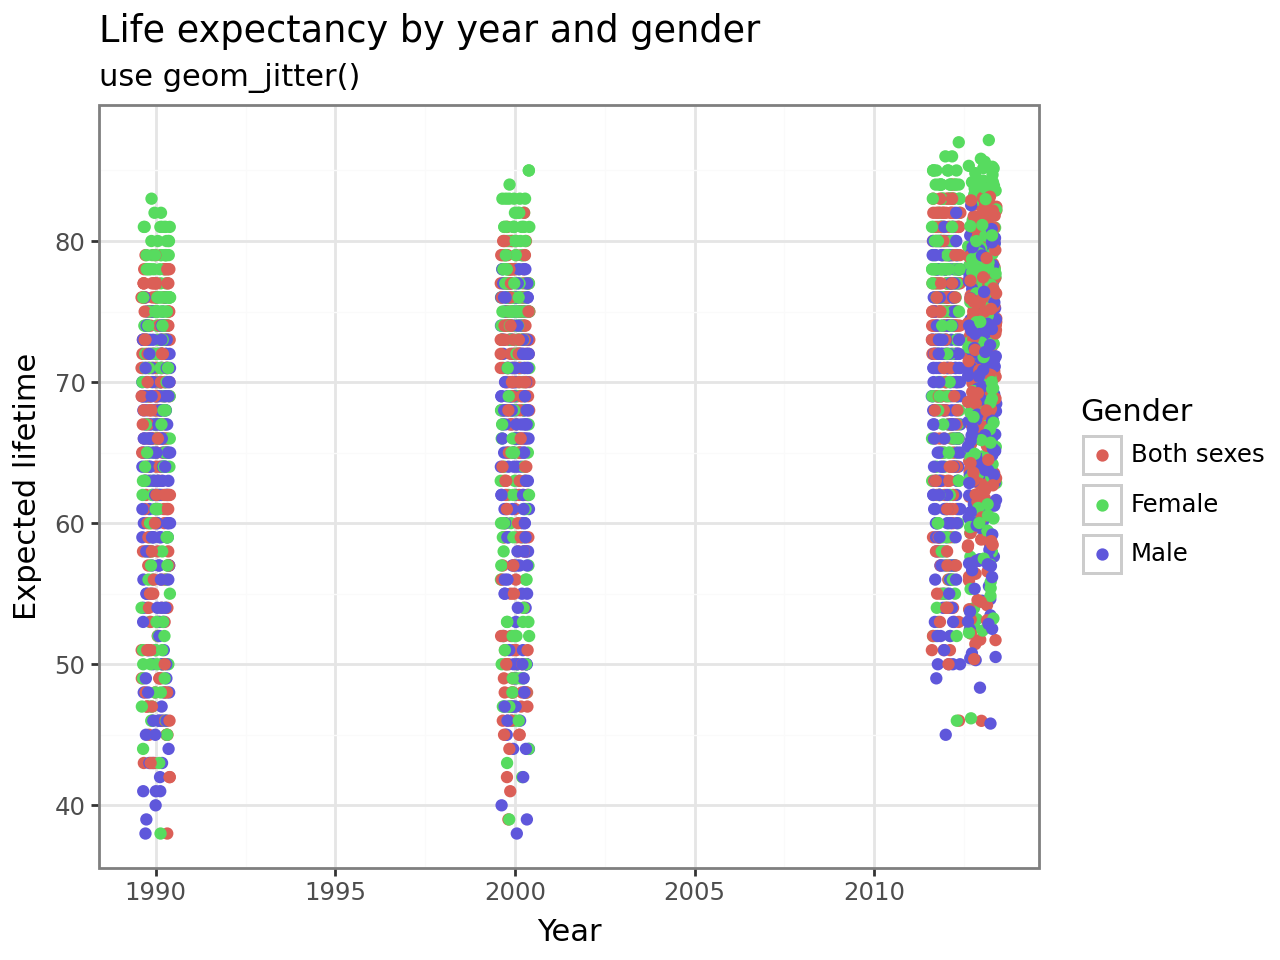

In [84]:
(
    ggplot(lifeexp) +
    aes(x='year', y='expected_lifetime', color='gender') +
    geom_jitter() +
    theme_bw() +
    labs(title='Life expectancy by year and gender', subtitle= 'use geom_jitter()', x= 'Year', y='Expected lifetime', color='Gender')
)

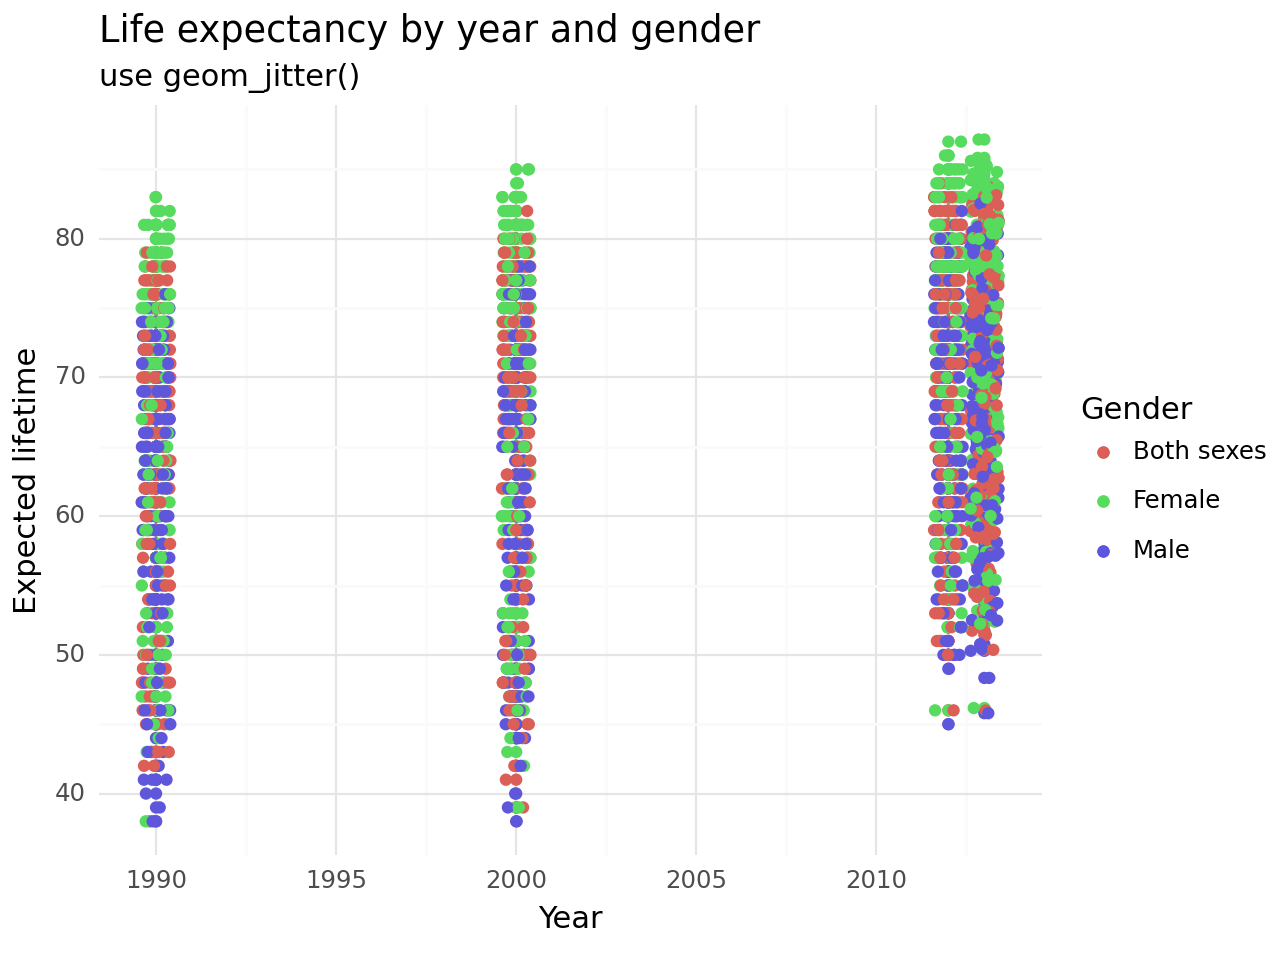

<Figure Size: (640 x 480)>

# Task 7

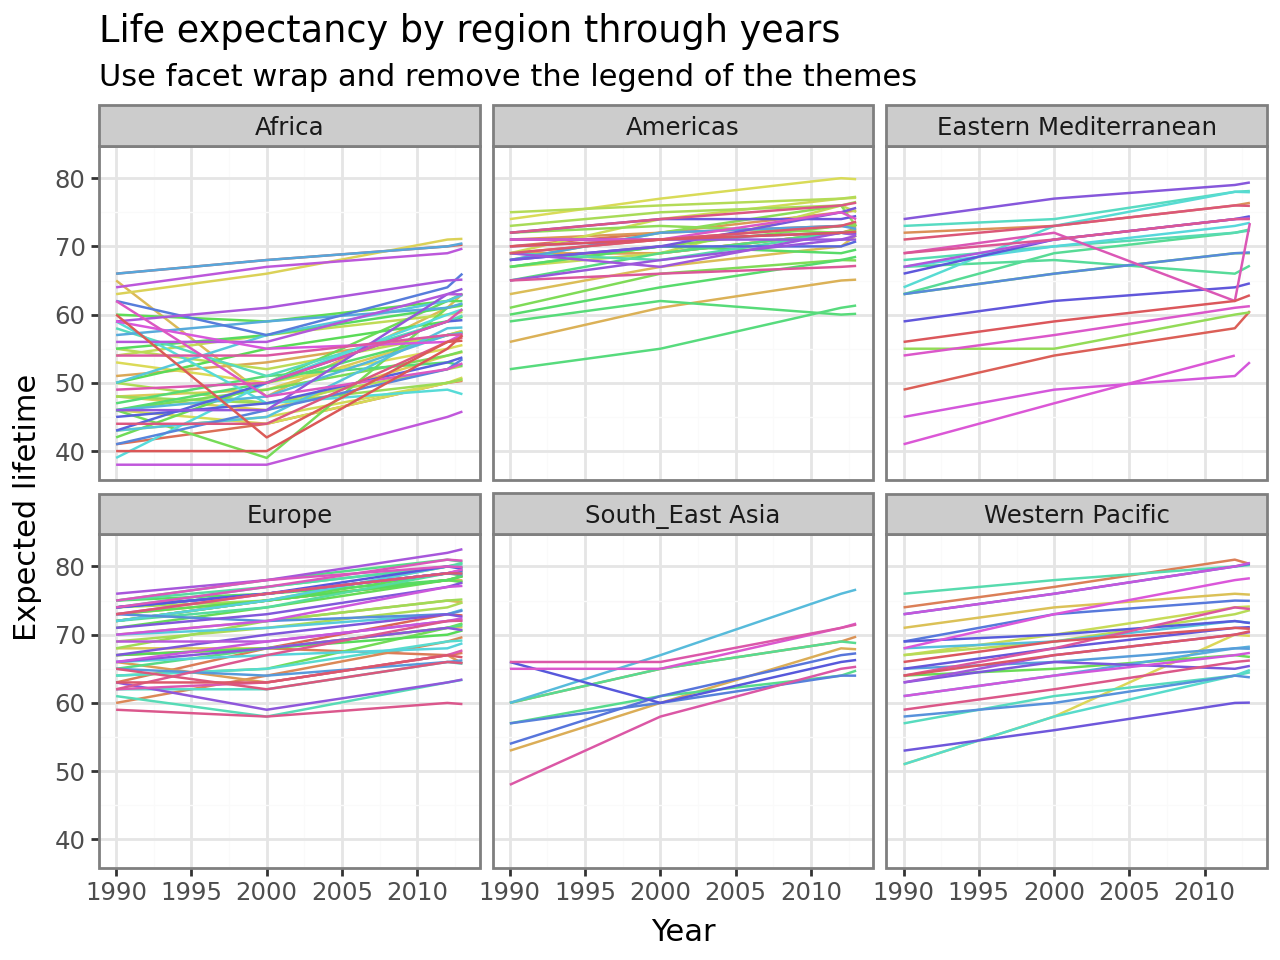

In [119]:
# use facet
(
    ggplot(lifeexp[lifeexp['gender']=='Male']) +
    aes(x= 'year', y= 'expected_lifetime', color='country') +
    geom_line() +
    facet_wrap('region') +
    theme_bw() +
    theme(legend_position='none') +
    labs(title='Life expectancy by region through years', subtitle='Use facet wrap and remove the legend of the themes', x='Year', y='Expected lifetime')
)


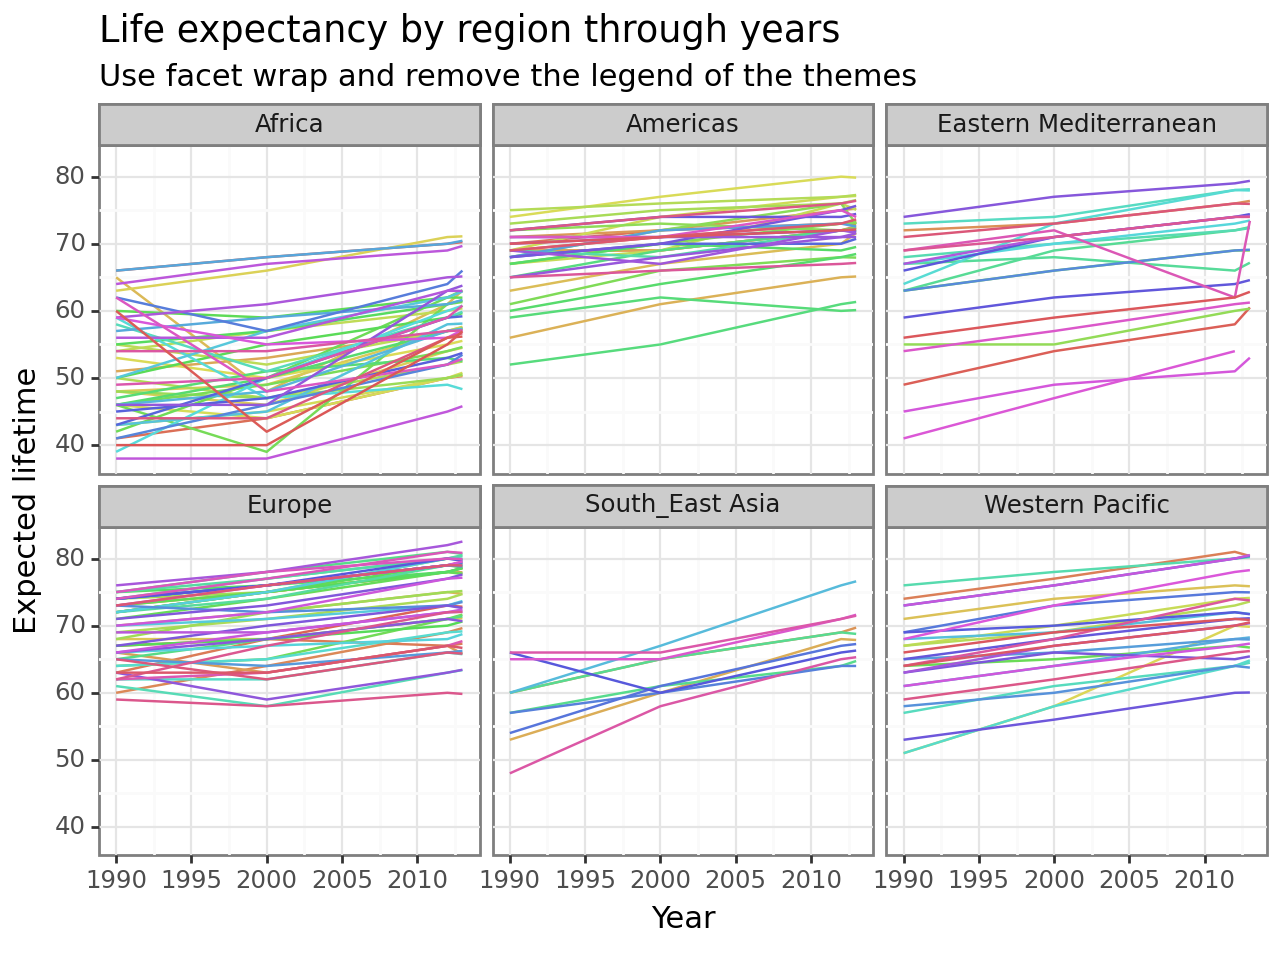

<Figure Size: (640 x 480)>

 # Task 8

  Merge the datasets: life expectency dataset filter for year 2013 and gender sould be both sexes

In [120]:
all_data = pd.merge(data, lifeexp[(lifeexp['year']==2013) & (lifeexp['gender']=='Both sexes')], on = 'country')

In [122]:
all_data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Region,Population,Pop. Density,GDP,Birthrate,Deathrate,year,region,gender,expected_lifetime
0,Afghanistan,0.0,0.0,0.0,0.0000,ASIA,31056997.0,47.96,700.0,46.60,20.34,2013,Eastern Mediterranean,Both sexes,61.25205
1,Albania,89.0,132.0,54.0,4.8675,EASTERN EUROPE,3581655.0,124.59,4500.0,15.11,5.22,2013,Europe,Both sexes,74.13000
2,Algeria,25.0,0.0,14.0,0.6903,AFRICA,32930091.0,13.83,6000.0,17.14,4.61,2013,Africa,Both sexes,71.82955
3,Andorra,245.0,138.0,312.0,12.3015,WESTERN EUROPE,71201.0,152.14,19000.0,8.71,6.25,2013,Europe,Both sexes,82.65301
4,Angola,217.0,57.0,45.0,5.6463,AFRICA,12127071.0,9.73,1900.0,45.11,24.20,2013,Africa,Both sexes,51.74093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Venezuela,333.0,100.0,3.0,7.7172,SOUTH AMERICA,25730435.0,28.21,4800.0,18.71,4.92,2013,Americas,Both sexes,75.92431
178,Vietnam,111.0,2.0,1.0,2.0178,ASIA,84402966.0,256.11,2500.0,16.86,6.22,2013,Western Pacific,Both sexes,75.68709
179,Yemen,6.0,0.0,0.0,0.1062,NEAR EAST,21456188.0,40.64,800.0,42.89,8.30,2013,Eastern Mediterranean,Both sexes,64.25762
180,Zambia,32.0,19.0,4.0,0.9735,AFRICA,11502010.0,15.28,800.0,41.00,19.93,2013,Africa,Both sexes,58.46280


# Task 9

In [ ]:
# + geom_smooth() to add the line

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


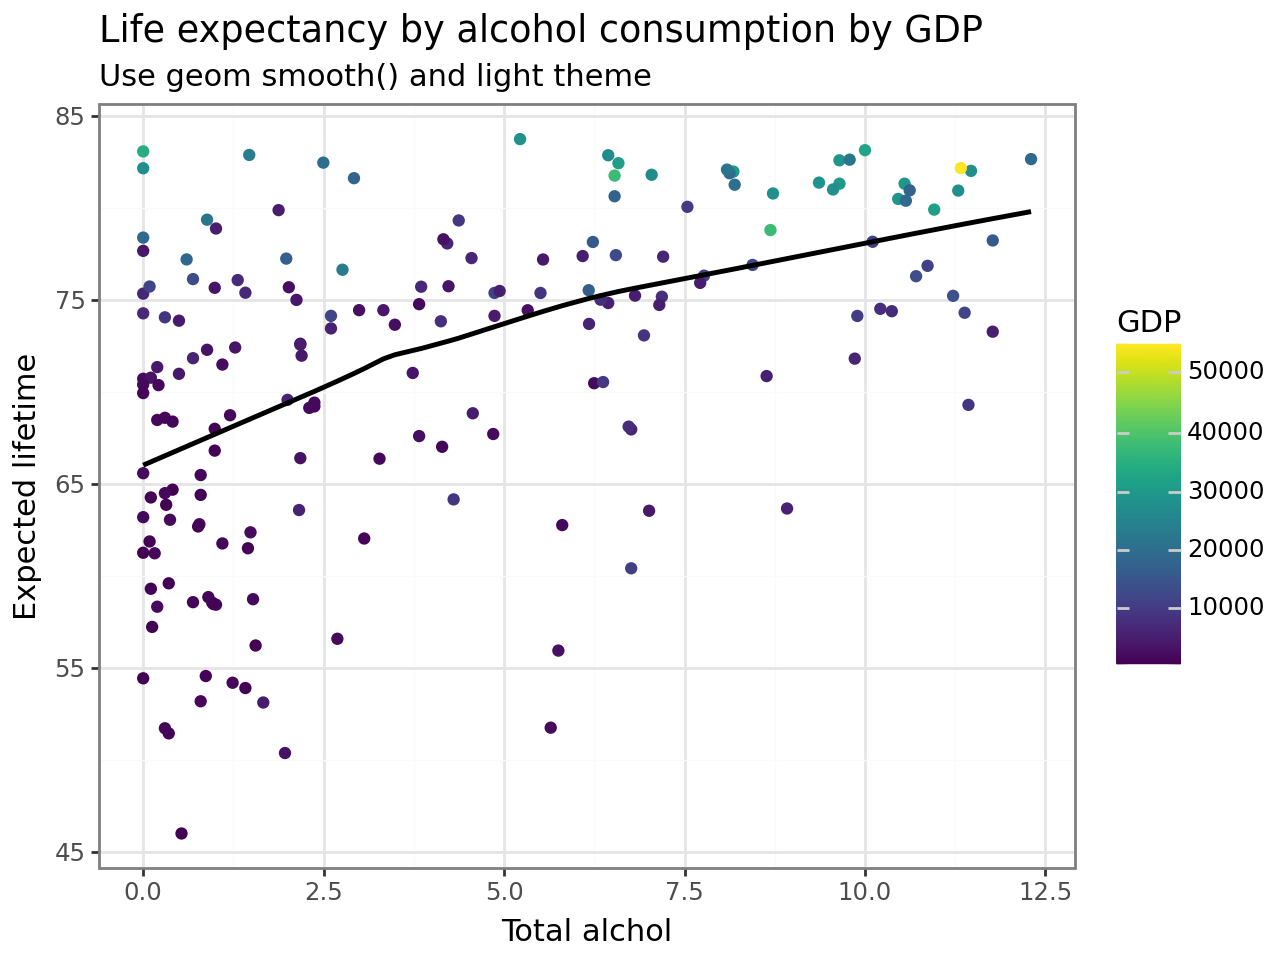

In [130]:
(
    ggplot(all_data) +
    aes(x= 'total_litres_of_pure_alcohol', y= 'expected_lifetime', color='GDP') +
    geom_point() +
    geom_smooth() +
    theme_bw() +
    labs(title='Life expectancy by alcohol consumption by GDP', subtitle= 'Use geom smooth() and light theme', x= 'Total alchol', y= 'Expected lifetime')
)

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


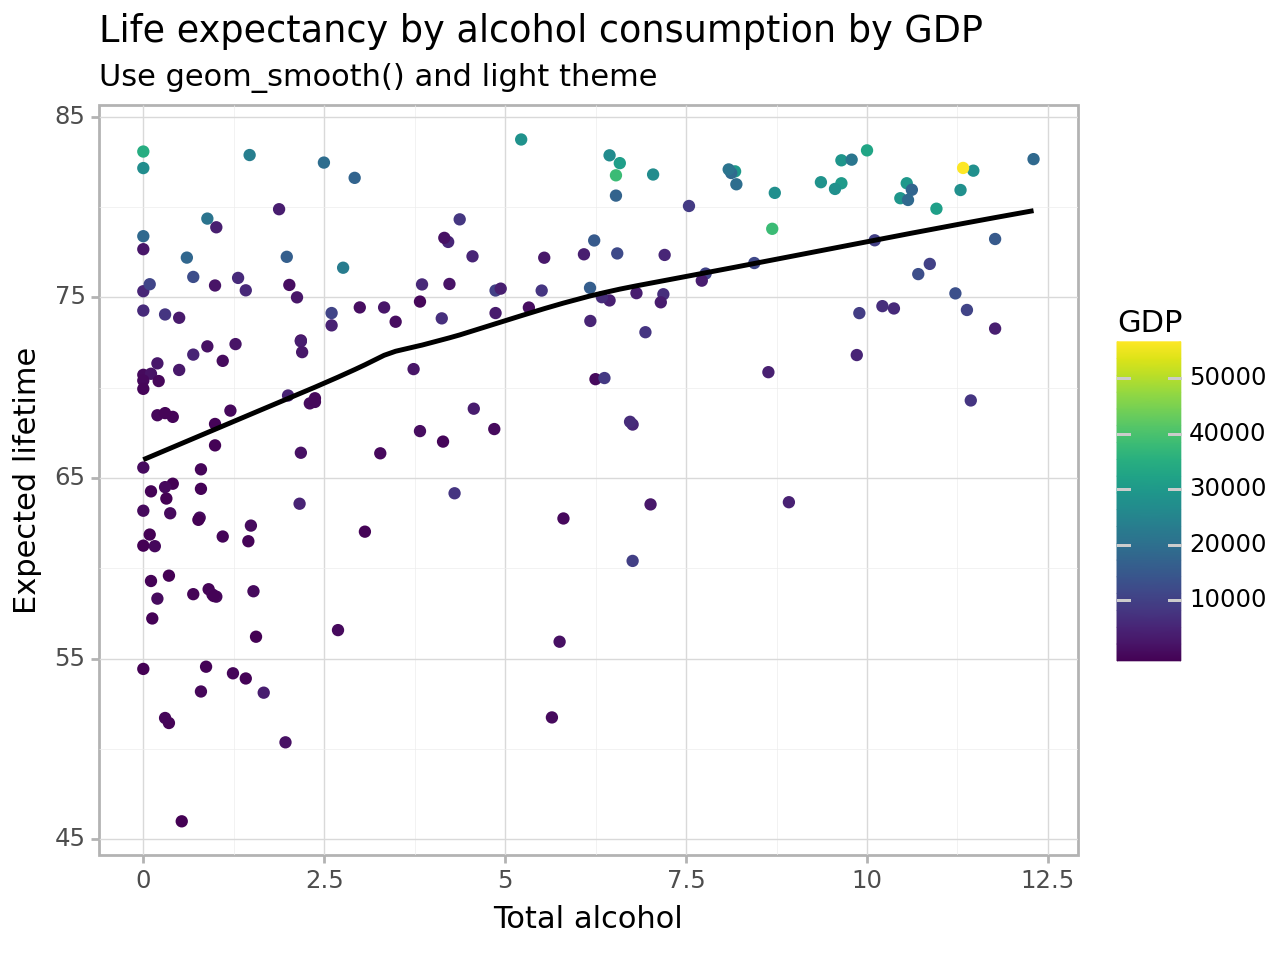

<Figure Size: (640 x 480)>

# Task 10

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


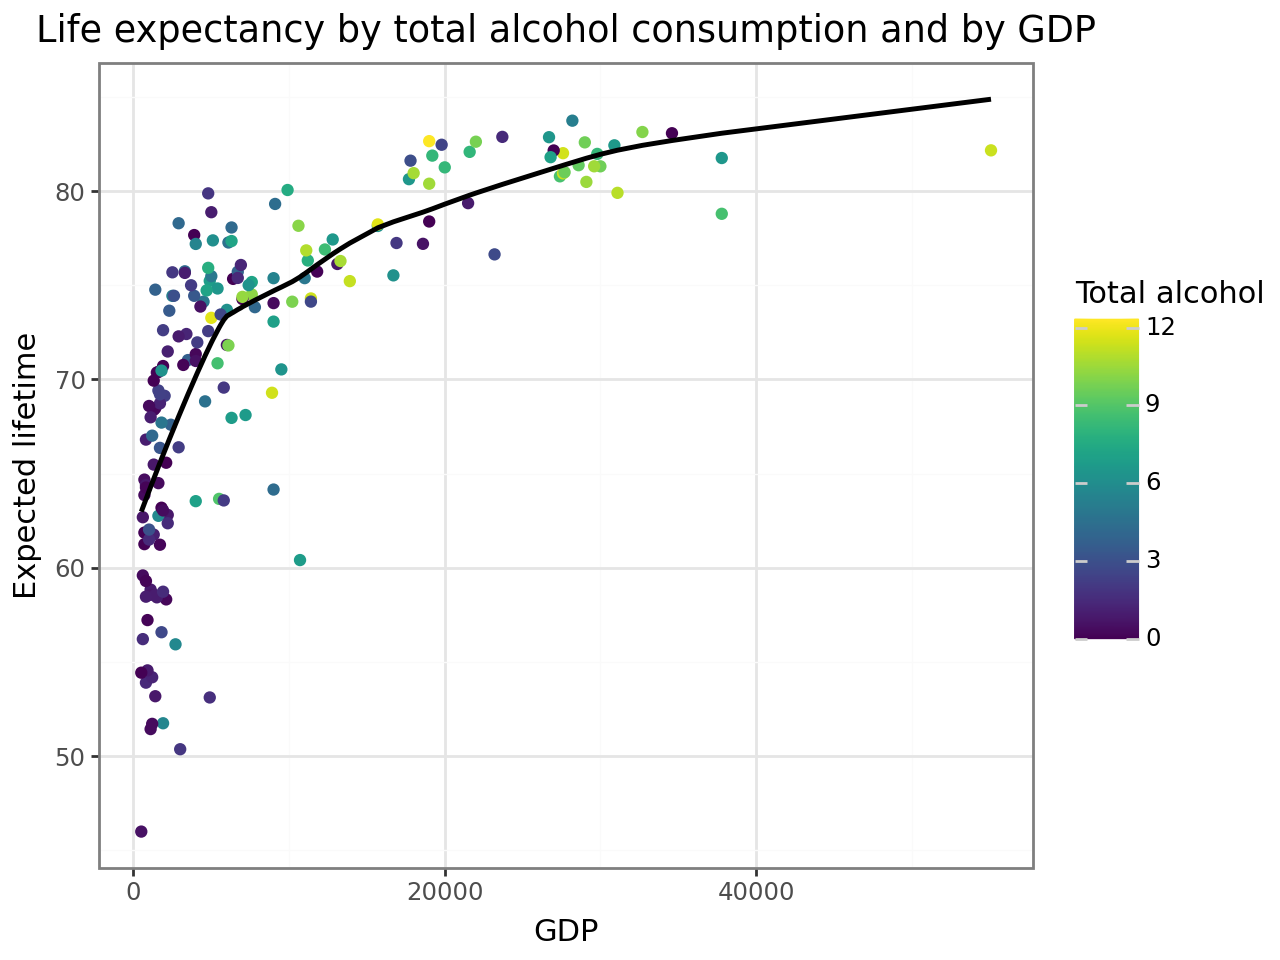

In [143]:
(
    ggplot(all_data) +
    aes(x= 'GDP', y= 'expected_lifetime', color='total_litres_of_pure_alcohol') +
    geom_point() +
    geom_smooth() +
    theme_bw() +
    labs(title= 'Life expectancy by total alcohol consumption and by GDP', x= 'GDP', y= 'Expected lifetime', color= 'Total alcohol')
)

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


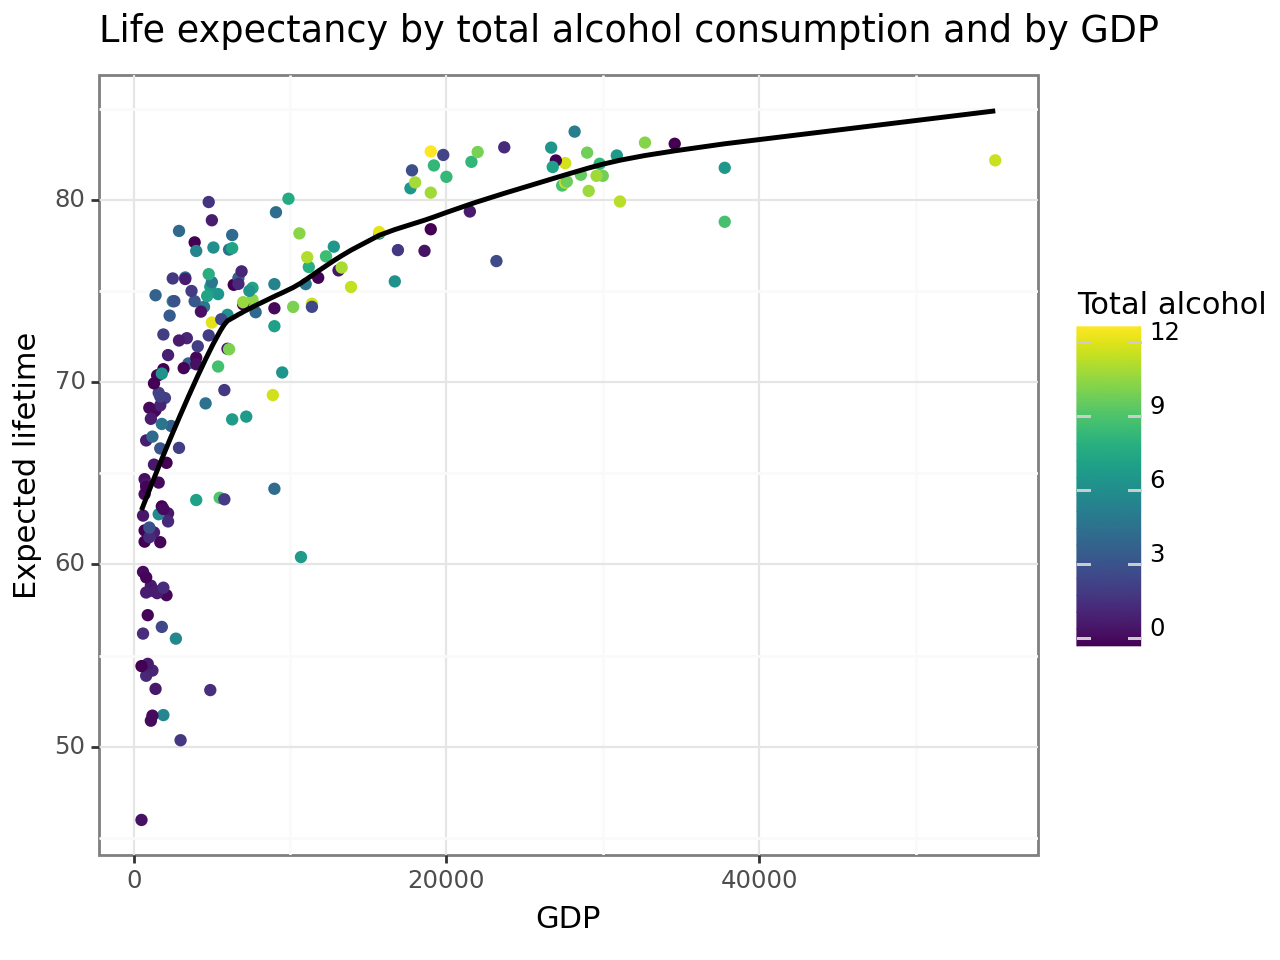

<Figure Size: (640 x 480)>

# Task 11

In [154]:
(
    ggplot(all_data) +
    aes(x='GDP', y='expected_lifetime', color='region') +
    geom_point() +
    geom_smooth(color='region')
)

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


ValueError: Invalid RGBA argument: 'region'

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


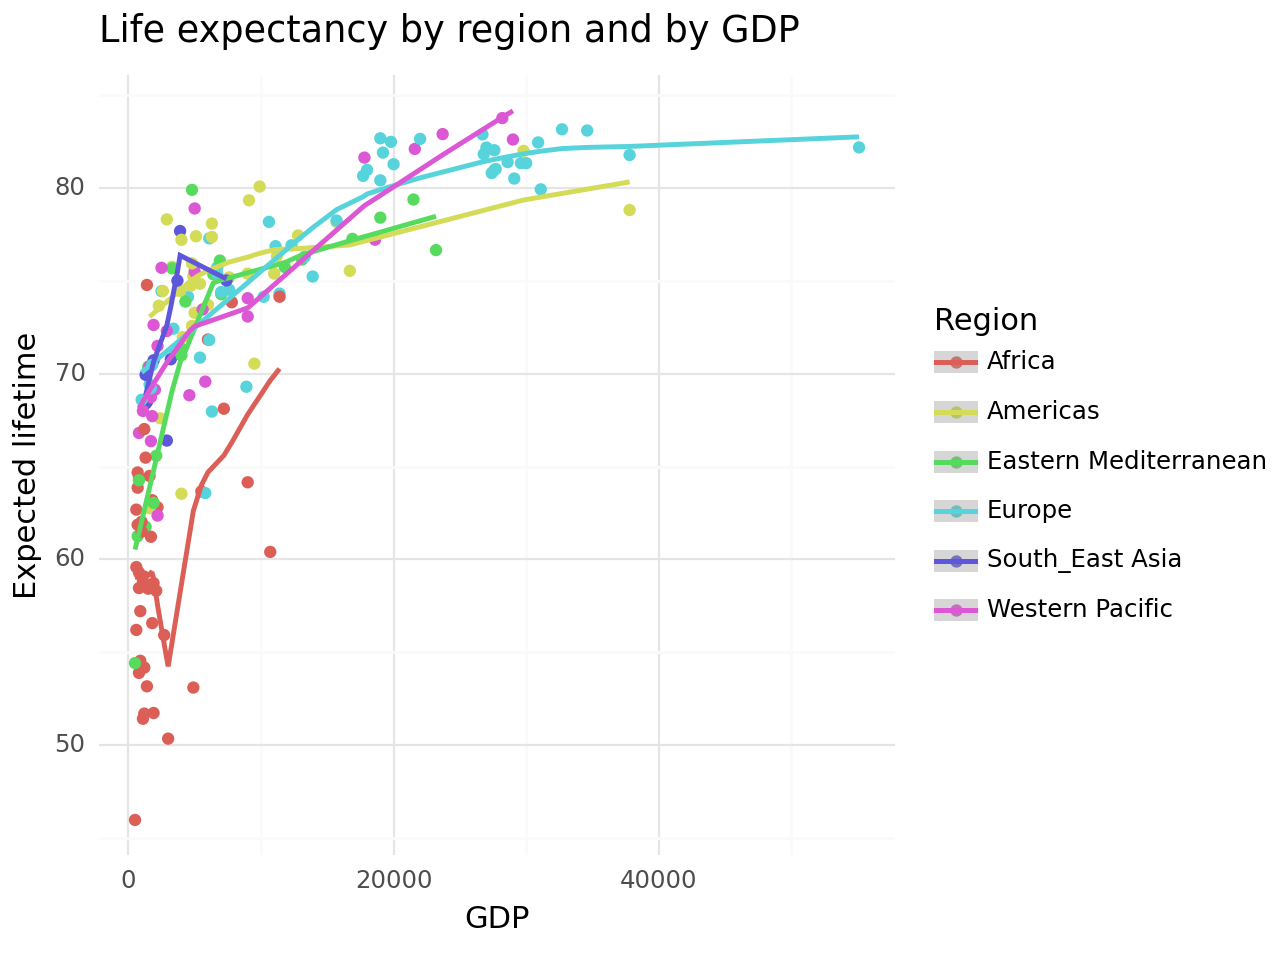

<Figure Size: (640 x 480)>

# Task 12

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


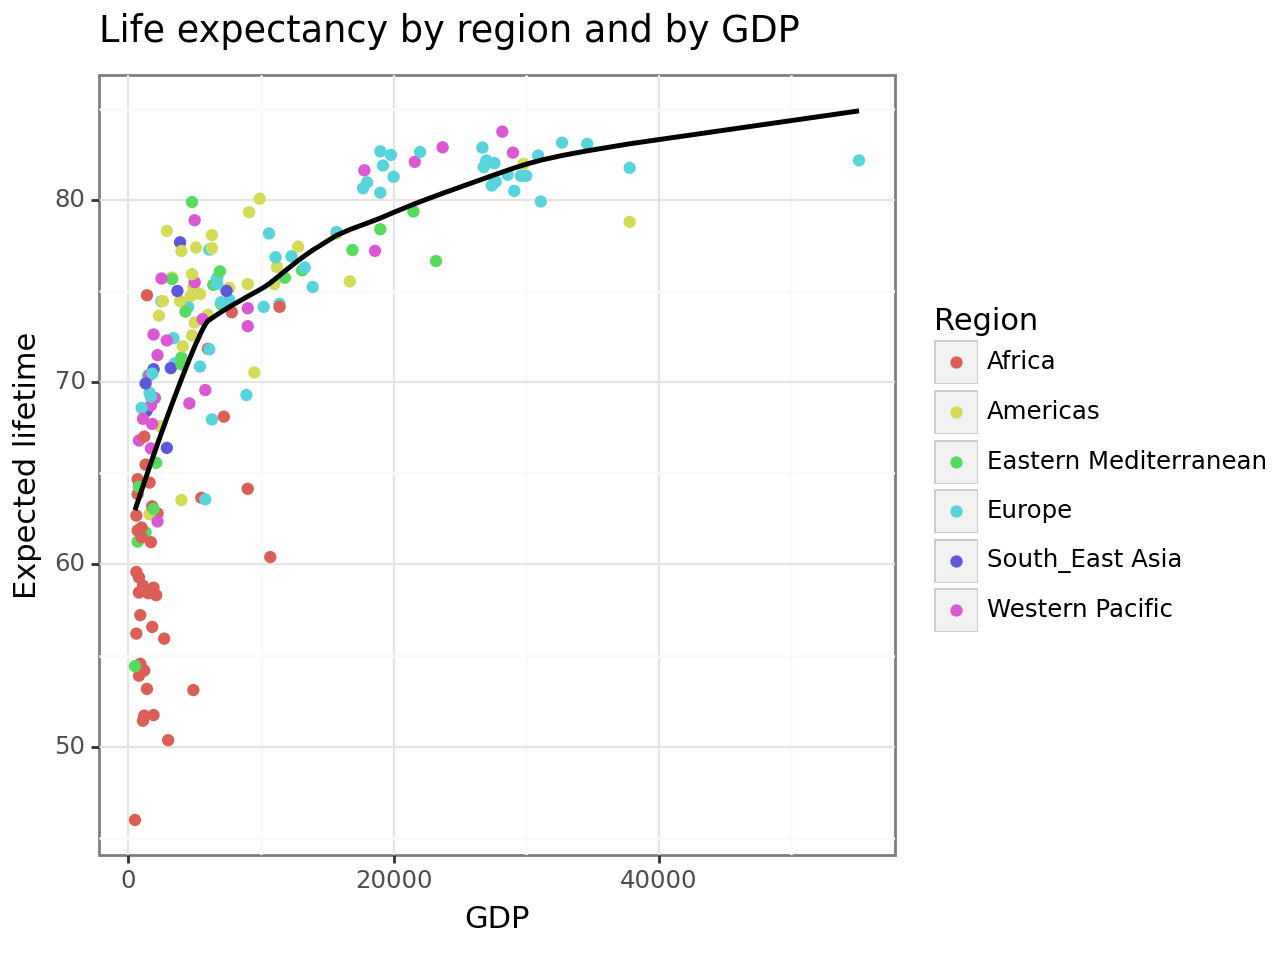

<Figure Size: (640 x 480)>